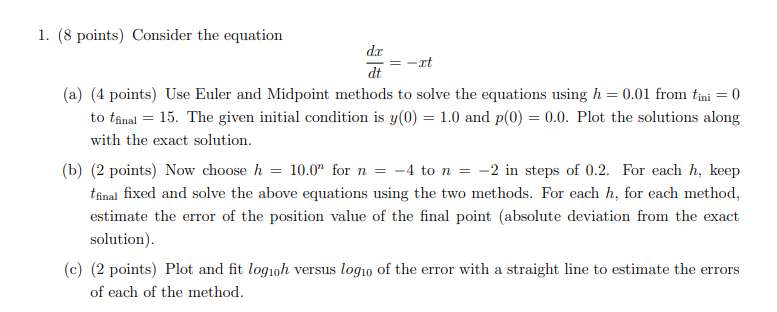

In [299]:
def euler(f,h,x,t):
    return x+h*f(x,t)
def midpoint(f,h,x,t):
    k=h*f(x,t)
    return x+h*f(x+k/2,t+h/2)
def f(x,t):
    return (-1)*x*t


In [300]:
import numpy as np
a=np.arange(0.0,15.01,0.01)
eu=[1.0]
mid=[1.0]
for i in a[1:]:
    eu.append(euler(f,0.01,eu[-1],i))
    mid.append(midpoint(f,0.01,mid[-1],i))
    

    

Text(0, 0.5, 'x')

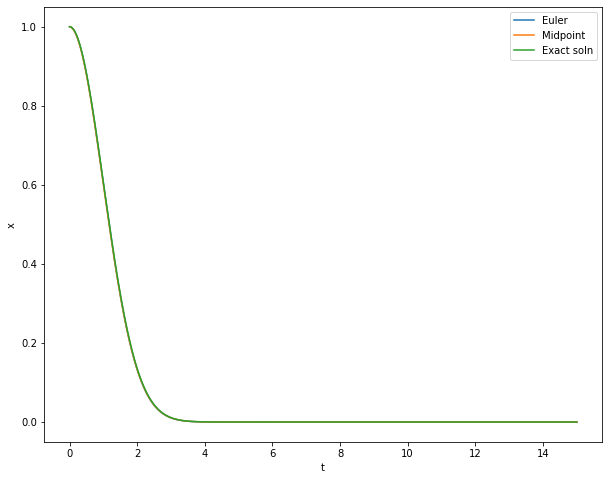

In [301]:
import matplotlib.pyplot as plt
def xreal(t):
    return np.exp(-(t**2)/2)
plt.figure(figsize=(10,8))
plt.plot(a,eu,label="Euler")
plt.plot(a,mid,label="Midpoint")
plt.plot(a,xreal(a),label="Exact soln")
plt.legend()
plt.xlabel("t")
plt.ylabel("x")

In [310]:

c=np.arange(-4,-2,0.2)
ereu=[]
ermid=[]
for i in c:
    h=10**(i)
    a=np.arange(0.0,2+h,h)
    eu=[1.0]
    mid=[1.0]
    for i in a[:-1]:
        eu.append(euler(f,h,eu[-1],i))
        mid.append(midpoint(f,h,mid[-1],i))
    ereu.append(abs(xreal(2)-eu[-1]))
    ermid.append(abs(xreal(2)-mid[-1]))
    
        
    
   

    

    

    

In [314]:
euerr=np.log10(ereu)
miderr=np.log10(ermid)



Text(0, 0.5, 'log(error)')

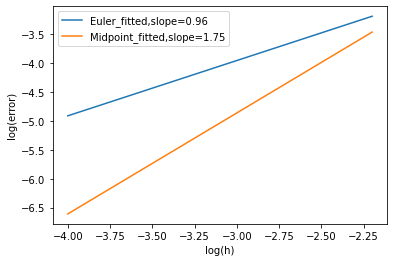

In [315]:
from scipy.optimize import curve_fit
def test(x, a, b):
    return a *x + b
sf,inf=curve_fit(test,c,euerr)[0][0],curve_fit(test, c, euerr)[0][1]
sb,info=curve_fit(test,c,miderr)[0][0],curve_fit(test, c, miderr)[0][1]

plt.plot(c,sf*c+inf*np.ones(len(c)),label="Euler_fitted,slope=0.96")
plt.plot(c,sb*c+info*np.ones(len(c)),label="Midpoint_fitted,slope=1.75")
plt.legend()
plt.xlabel("log(h)")
plt.ylabel("log(error)")

In [316]:
print("The order of the error(Slope of the fitted line) estimated will be=",sf)
print("The order of the error(Slope of the fitted line) estimated will be=",sb)

The order of the error(Slope of the fitted line) estimated will be= 0.9581520730446628
The order of the error(Slope of the fitted line) estimated will be= 1.7496838062519686


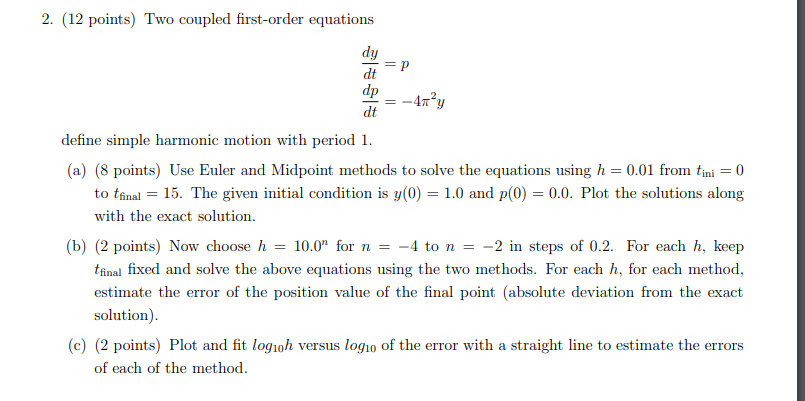

In [274]:
def f1(p):
    return p

def f2(y):
    return -4*(np.pi**2)*y

a=np.arange(0.0,15.01,0.01)

def euler(f1,f2,h,y,p):
    return [y+h*f1(p),p+h*f2(y)]
    

def midpoint(f1,f2,h,y,p):
    ka=h*f1(p)
    kb=h*f2(y)
    return [y+h*f1(p+kb/2),p+h*f2(y+ka/2)]

euy=[1.0]
eup=[0.0]


midy=[1.0]
midp=[0.0]

for i in a[1:]:
        x=euler(f1,f2,0.01,euy[-1],eup[-1])
        euy.append(x[0])
        eup.append(x[1])   
        x=midpoint(f1,f2,0.01,midy[-1],midp[-1])   
        midy.append(x[0])
        midp.append(x[1])
    
    
       
    

    
    
   
    
    
def exact(t):
    return np.cos(2*np.pi*t)
def exactp(t):
    return -2*np.pi*np.sin(2*np.pi*t)

    





Text(0, 0.5, 'Y')

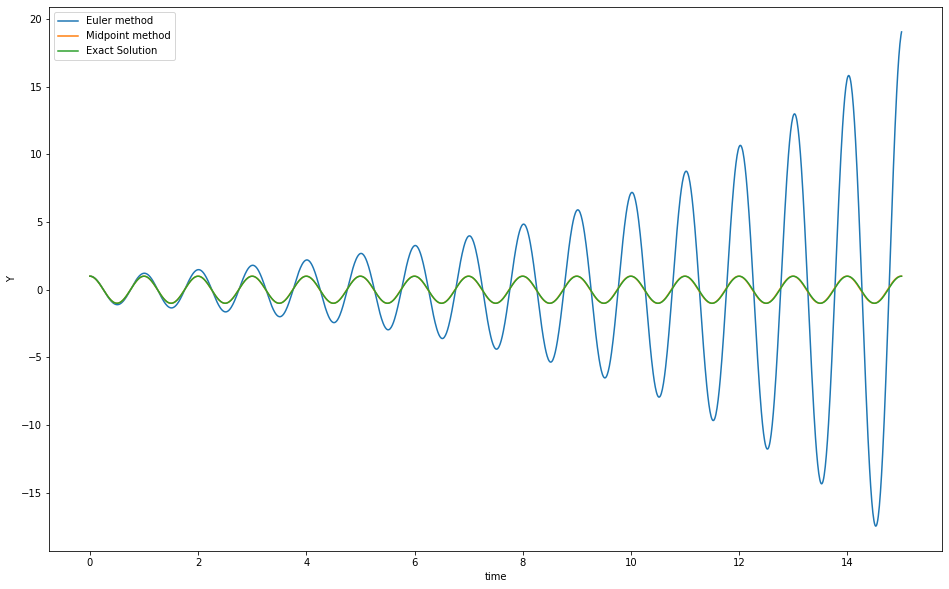

In [275]:
plt.figure(figsize=(16,10))
plt.plot(a,euy, label="Euler method")
plt.plot(a,midy,label="Midpoint method")
plt.plot(a,exact(a),label="Exact Solution")
plt.legend()
plt.xlabel("time")
plt.ylabel("Y")

Text(0, 0.5, 'P')

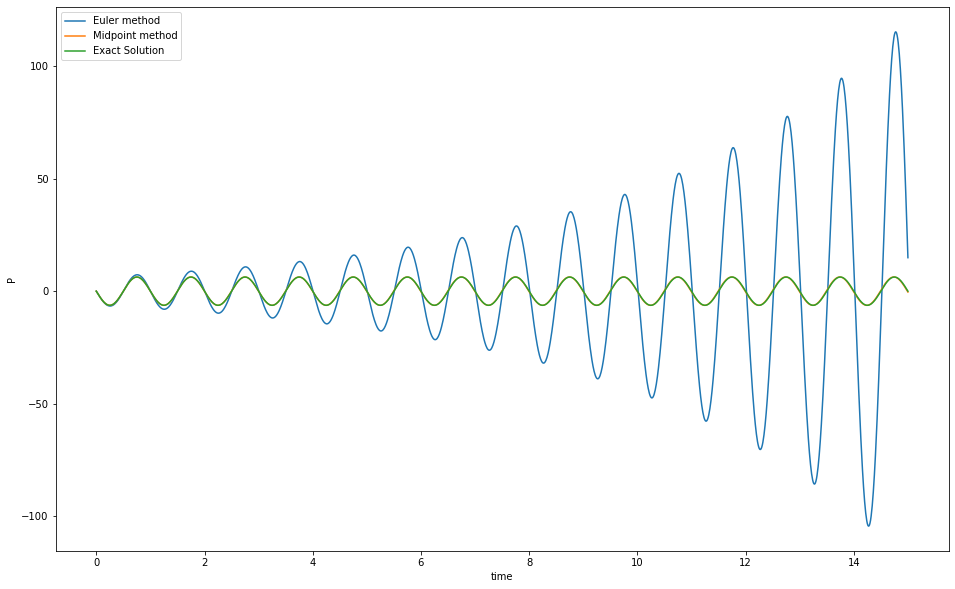

In [276]:
plt.figure(figsize=(16,10))
plt.plot(a,eup,label="Euler method")
plt.plot(a,midp,label="Midpoint method")
plt.plot(a,exactp(a),label="Exact Solution")
plt.legend()
plt.xlabel("time")
plt.ylabel("P")

In [277]:
c=np.arange(-4,-2,0.2)
ereu=[]
ermid=[]
w=exact(15)
for i in c:
    h=10**(i)
    a=np.arange(0.0,15+h,h)
    euy=[1.0]
    eup=[0.0]
    midy=[1.0]
    midp=[0.0]
    for i in a[1:]:
        x=euler(f1,f2,h,euy[-1],eup[-1])
        euy.append(x[0])
        eup.append(x[1])   
        x=midpoint(f1,f2,h,midy[-1],midp[-1])   
        midy.append(x[0])
        midp.append(x[1])


        
    
        
        
        
    ereu.append(abs(w-euy[-1]))
    ermid.append(abs(w-midy[-1]))







Text(0, 0.5, 'Absolute error')

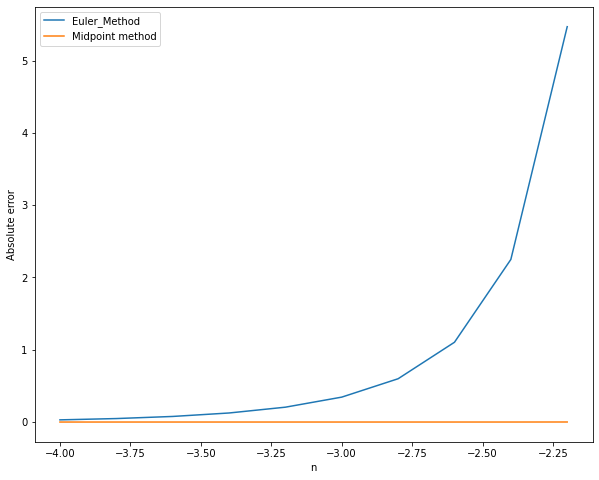

In [278]:
plt.figure(figsize=(10,8))
plt.plot(c,ereu,label="Euler_Method")
plt.plot(c,ermid,label="Midpoint method")
plt.legend()
plt.xlabel("n")
plt.ylabel("Absolute error")



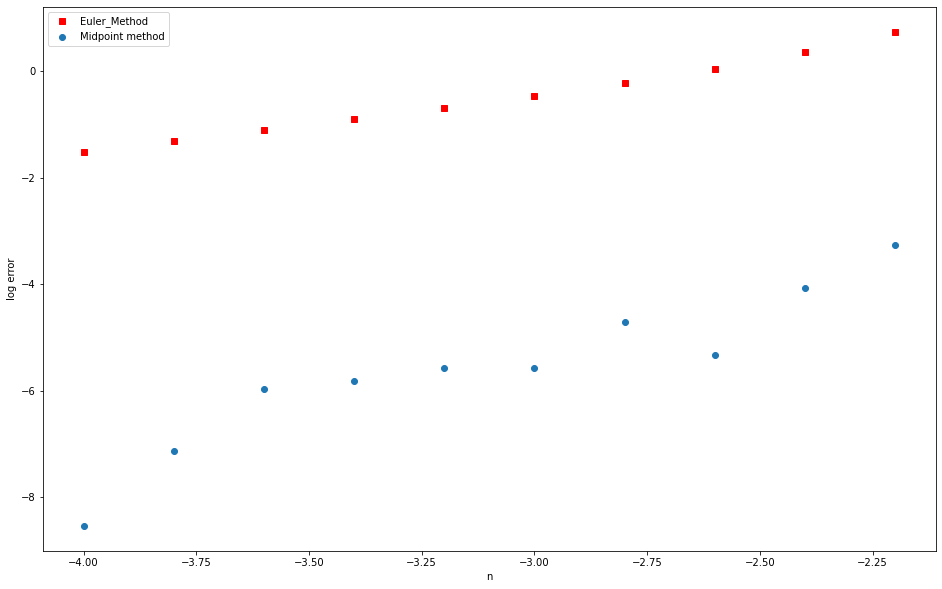

In [279]:
euerr=np.log10(ereu)
miderr=np.log10(ermid)
plt.figure(figsize=(16,10))
plt.plot(c,euerr,'s',color='red',label="Euler_Method")
plt.scatter(c,miderr,label="Midpoint method")
plt.legend()
plt.xlabel("n")
plt.ylabel("log error")
plt.legend()


Text(0, 0.5, 'log(Error)')

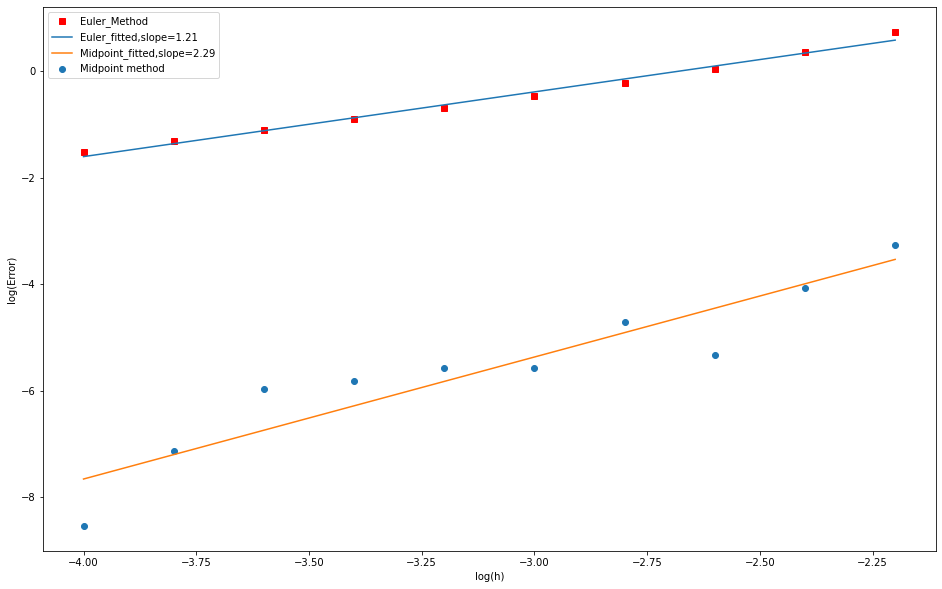

In [280]:
from scipy.optimize import curve_fit
def test(x, a, b):
    return a *x + b
plt.figure(figsize=(16,10))
sf,inf=curve_fit(test,c,euerr)[0][0],curve_fit(test, c, euerr)[0][1]
plt.plot(c,euerr,'s',color='red',label="Euler_Method")
plt.scatter(c,miderr,label="Midpoint method")
sb,info=curve_fit(test,c,miderr)[0][0],curve_fit(test, c, miderr)[0][1]
plt.plot(c,sf*c+inf*np.ones(len(c)),label="Euler_fitted,slope=1.21")

plt.plot(c,sb*c+info*np.ones(len(c)),label="Midpoint_fitted,slope=2.29")
plt.legend()
plt.xlabel("log(h)")
plt.ylabel("log(Error)")

In [259]:
print("The slope of the fitted line in Euler's method=",sf)
print("The slope of the fitted line in Midpoint's method=",sb)

The slope of the fitted line in Euler's method= 1.2143337818942095
The slope of the fitted line in Midpoint's method= 2.289973938413505
